In [1]:
import shapely.geometry
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
# from shapely.geometry import Polygon, LineString, Point
from scipy import stats
from tqdm import tqdm
import pickle
import time

%load_ext autoreload
%autoreload 2
from functions import *

In [ ]:
# Antarctic continent
path = "D:\\Landfast\\USNIC_ANTARC_shelf_2022.shp"
ice_shelf = gpd.read_file(path).to_crs('EPSG:3976') #.loc[1723:1723, :].reset_index(drop = True)

w = [0.5, 1.0]

for year in [2019]:
    for lat0 in np.arange(-80, -60+w[0], w[0]*2):
        for lon0 in np.arange(-179, 179+w[1], w[1]*2):
    
            # point = gpd.points_from_xy([-108], [-80], crs = 'EPSG:4326').to_crs('EPSG:3976')
            point = pd.DataFrame({"lat": [lat0], "lon": [lon0]})
            point1 = gpd.GeoDataFrame(point, geometry=gpd.points_from_xy(point.lon, point.lat), crs="EPSG:4326").to_crs('EPSG:3976')
            intersect = ice_shelf.sjoin(point1)
    
            t0 = time.time()
            
            if len(intersect) == 0 and os.path.exists(f"D:\\IS2_iceberg\\Tables\\Iceberg_table_{year}_{lat0}_{lon0}.csv") == False: # Not in the Antarctic continent
                center = [lat0, lon0]        
                gdf = read_ATL03_resample(center, w, year)
                t1 = time.time() - t0
                ib_data = pd.DataFrame()
                ib_raw = []
                
                if len(gdf) > 0:
                    ib_data, ib_raw = find_icebergs(gdf)
                    N = len(ib_data)
                    t2 = time.time() - t0 - t1
                    print(f"{year} - Lat: {lat0}, Lon: {lon0}; Icebergs: {N} ({t1:.1f} + {t2:.1f} seconds)")              
                else:
                    print(f"{year} - Lat: {lat0}, Lon: {lon0}; No available ATL03 data ({t1:.1f} seconds)")

                try:
                    ib_data.to_csv(f"D:\\IS2_iceberg\\Tables\\Iceberg_table_{year}_{lat0}_{lon0}.csv")
                    with open(f"D:\\IS2_iceberg\\Profiles\\Iceberg_profile_{year}_{lat0}_{lon0}.pkl", "wb") as output:
                        pickle.dump(ib_raw, output)
                except:
                    ib_data.to_csv(f"Iceberg_table_{year}_{lat0}_{lon0}.csv")
                    with open(f"Iceberg_profile_{year}_{lat0}_{lon0}.pkl", "wb") as output:
                        pickle.dump(ib_raw, output)
                
                del gdf, ib_data, ib_raw             
                    
# if len(gdf) > 0:
#     # Display Statistics
#     print("Reference Ground Tracks: {}".format(gdf["rgt"].unique()))
#     print("Cycles: {}".format(gdf["cycle"].unique()))
#     print("Received {} elevations".format(len(gdf)))

2019 - Lat: -73.0, Lon: -81.0; Icebergs: 71 (179.9 + 28.6 seconds)
2019 - Lat: -73.0, Lon: -73.0; Icebergs: 343 (168.8 + 34.3 seconds)


Exception <-1>: Failure on resource ATL03_20190216010307_07570210_006_02.h5 track 1.0: H5Coro::Future read failure on /gt1l/heights/dist_ph_along


2019 - Lat: -73.0, Lon: -59.0; Icebergs: 73 (173.7 + 45.0 seconds)
2019 - Lat: -73.0, Lon: -57.0; Icebergs: 2 (155.4 + 41.4 seconds)
2019 - Lat: -73.0, Lon: -55.0; Icebergs: 6 (164.8 + 41.9 seconds)
2019 - Lat: -73.0, Lon: -53.0; Icebergs: 0 (133.0 + 29.0 seconds)
2019 - Lat: -73.0, Lon: -51.0; Icebergs: 1 (206.2 + 45.0 seconds)
2019 - Lat: -73.0, Lon: -49.0; Icebergs: 1 (188.3 + 41.9 seconds)
2019 - Lat: -73.0, Lon: -47.0; Icebergs: 2 (206.6 + 50.4 seconds)
2019 - Lat: -73.0, Lon: -45.0; Icebergs: 4 (205.8 + 41.1 seconds)
2019 - Lat: -73.0, Lon: -43.0; Icebergs: 5 (238.1 + 43.0 seconds)
2019 - Lat: -73.0, Lon: -41.0; Icebergs: 15 (252.0 + 50.3 seconds)
2019 - Lat: -73.0, Lon: -39.0; Icebergs: 4 (153.7 + 35.1 seconds)
2019 - Lat: -73.0, Lon: -37.0; Icebergs: 6 (134.0 + 30.8 seconds)
2019 - Lat: -73.0, Lon: -35.0; Icebergs: 6 (219.6 + 40.0 seconds)
2019 - Lat: -73.0, Lon: -33.0; Icebergs: 2 (205.0 + 49.9 seconds)
2019 - Lat: -73.0, Lon: -31.0; Icebergs: 5 (205.8 + 39.9 seconds)


Exception <-1>: Failure on resource ATL03_20191112101048_07100510_006_01.h5 track 3.0: H5Coro::Future read failure on /gt3l/geolocation/segment_id
Exception <-1>: Failure on resource ATL03_20191112101048_07100510_006_01.h5 track 3.1: H5Coro::Future read failure on /gt3r/heights/dist_ph_along


2019 - Lat: -73.0, Lon: -29.0; Icebergs: 0 (207.3 + 51.1 seconds)
2019 - Lat: -73.0, Lon: -27.0; Icebergs: 6 (219.5 + 44.8 seconds)
2019 - Lat: -73.0, Lon: -25.0; Icebergs: 2 (178.3 + 40.8 seconds)
2019 - Lat: -73.0, Lon: -23.0; Icebergs: 9 (141.3 + 31.2 seconds)
2019 - Lat: -73.0, Lon: -21.0; Icebergs: 14 (121.4 + 29.0 seconds)
2019 - Lat: -73.0, Lon: 171.0; Icebergs: 58 (256.8 + 53.4 seconds)


In [7]:
with open(f"D:\\IS2_iceberg\\Profiles\\Iceberg_profile_{year}_{lat0}_{lon0}.pkl", "wb") as output:
    pickle.dump(ib_raw, output)

In [7]:
lat0 = -78.0
lon0 = -175.0
with open(f"D:\\IS2_iceberg\\Profiles\\Iceberg_profile_{year}_{lat0}_{lon0}.pkl", "rb") as output:
    ib_raw = pickle.load(output)

ib_data = pd.read_csv(f"D:\\IS2_iceberg\\Tables\\Iceberg_table_{year}_{lat0}_{lon0}.csv", index_col = 0)

In [198]:
rgt = 1384
cycle = 7
gt = 50
gdf1 = gdf[(gdf["rgt"] == rgt) & (gdf["cycle"] == cycle) & (gdf["gt"] == gt)].reset_index(drop = True)
gdf1

,cycle,segment_id,n_fit_photons,h_mean,rgt,rms_misfit,dh_fit_dx,h_sigma,y_atc,spot,x_atc,gt,region,lon,lat,fb,year,month,day
0,7,1406687,25,-29.619011,1384,0.236987,0.084614,0.049872,-3321.914795,5,28161136.0,50,10,-108.627846,-72.501674,1.240989,2020,6,25
1,7,1406687,23,-29.530747,1384,0.311511,-0.089023,0.064974,-3321.909424,5,28161138.0,50,10,-108.627854,-72.501692,1.329253,2020,6,25
2,7,1406687,23,-29.470540,1384,0.241441,-0.105432,0.050448,-3321.904297,5,28161140.0,50,10,-108.627862,-72.501709,1.389460,2020,6,25
3,7,1406687,28,-29.600935,1384,0.204348,-0.012788,0.042421,-3321.900391,5,28161142.0,50,10,-108.627870,-72.501727,1.259065,2020,6,25
4,7,1406688,22,-29.737089,1384,0.215222,-0.067412,0.046605,-3321.891357,5,28161146.0,50,10,-108.627886,-72.501763,1.122911,2020,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36305,7,1411107,18,21.212373,1384,0.809508,0.552357,0.190885,-3321.165527,5,28249130.0,50,10,-108.999912,-73.282594,52.072373,2020,6,25
36306,7,1411108,26,21.693470,1384,0.437850,0.194848,0.094624,-3321.161377,5,28249132.0,50,10,-108.999921,-73.282612,52.553470,2020,6,25
36307,7,1411108,35,22.068403,1384,0.697186,-0.037501,0.123411,-3321.157471,5,28249136.0,50,10,-108.999938,-73.282648,52.928403,2020,6,25
36308,7,1411108,28,22.377924,1384,0.918928,-0.347578,0.181732,-3321.155029,5,28249138.0,50,10,-108.999947,-73.282665,53.237924,2020,6,25


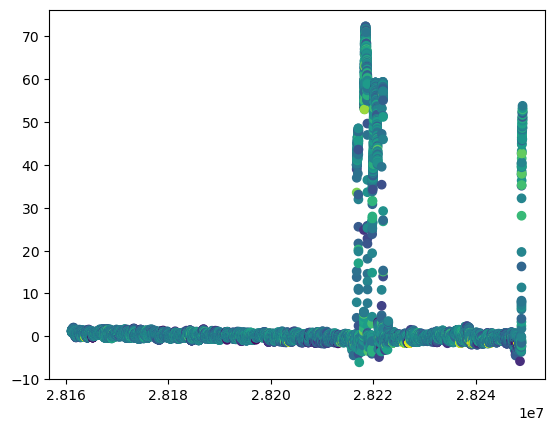

In [203]:
plt.scatter(gdf1['x_atc'], gdf1['fb'], c= gdf1['n_fit_photons'], vmin = 4, vmax = 50)

In [457]:
distance = np.zeros(len(gdf1)) * np.nan
distance[1:] = gdf1.loc[1:len(gdf1), 'x_atc'].values - gdf1.loc[0:len(gdf1)-2, 'x_atc'].values
gdf1['distance'] = distance
gdf2 = consecutive_grouping(gdf1)

gdf_ib = gdf2[(gdf2['ind_fb_10'] == 2) & (gdf2['h_sigma'] < 0.5)].reset_index(drop = True)

In [500]:
len(ib_raw)

234

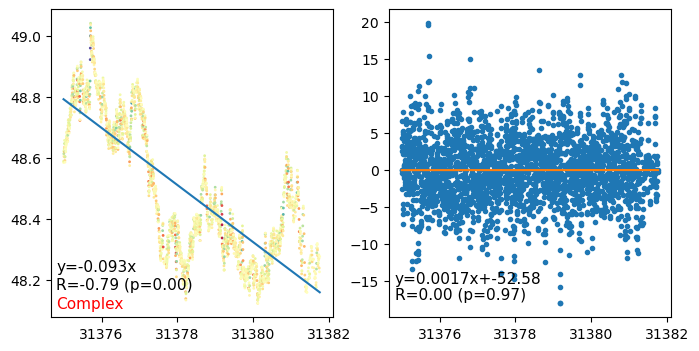

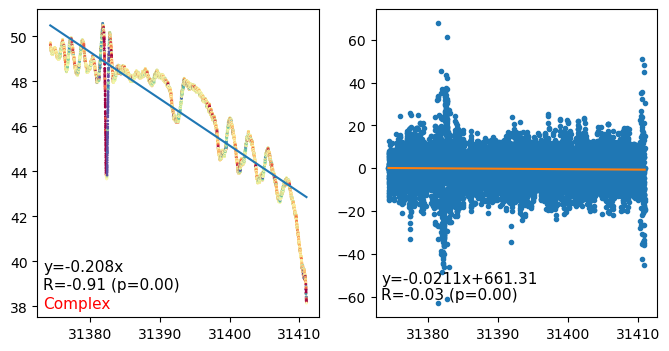

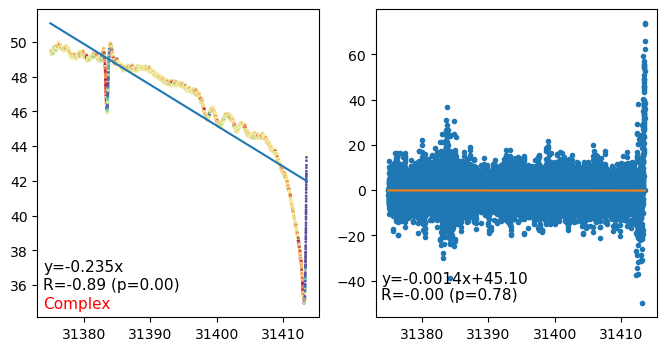

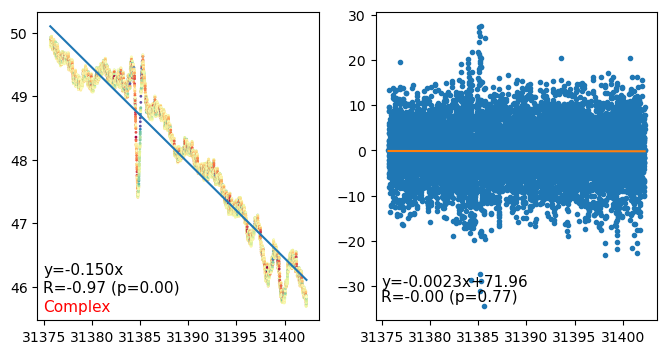

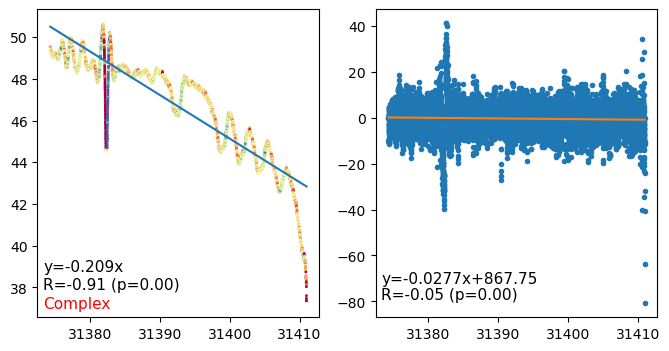

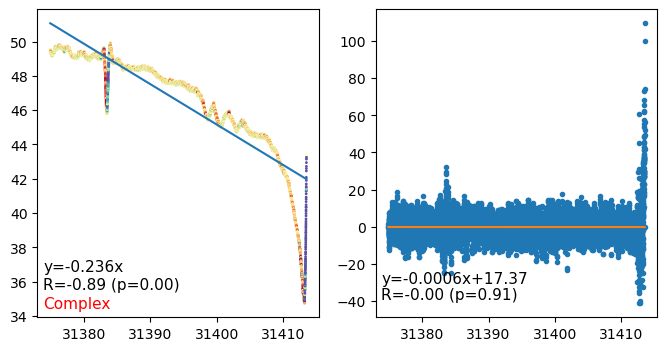

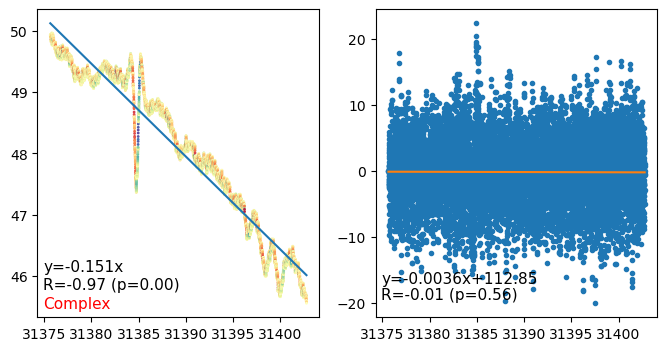

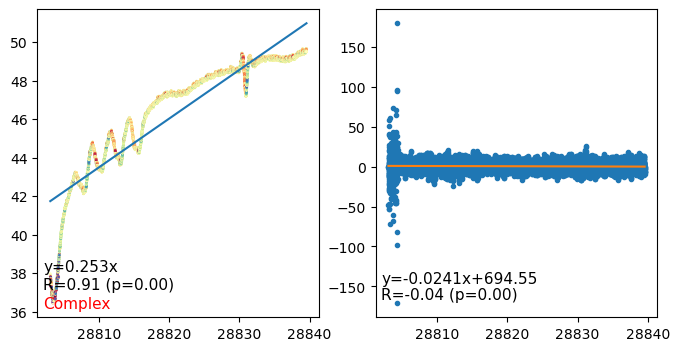

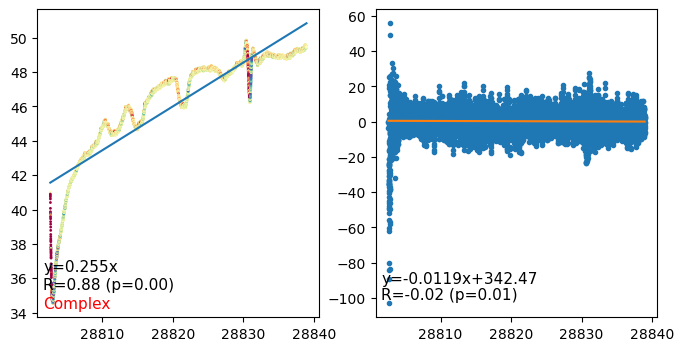

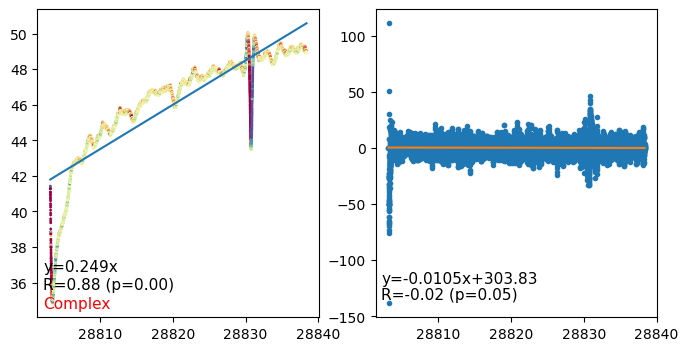

In [8]:
for k in range(0, 10):
    gdf_ib = ib_raw[k]
    
    x = gdf_ib['x_atc'].values * 0.001 #[2:-2]
    y = gdf_ib['fb'].values #[2:-2]
    
    N = 5
    sm = np.ones(N)/N
    x = np.convolve(x, sm, mode='valid')
    y = np.convolve(y, sm, mode='valid')
    slope = np.array([1, 1, -1, -1]) / 4
    dy = np.convolve(y, slope, mode='same') / np.convolve(x, slope, mode='same')
    
    reg1 = stats.linregress(x, y)
    
    a1 = reg1.slope
    b1 = reg1.intercept
    r1 = reg1.rvalue
    p1 = reg1.pvalue
    
    reg2 = stats.linregress(x, dy)
    
    a2 = reg2.slope
    b2 = reg2.intercept
    r2 = reg2.rvalue
    p2 = reg2.pvalue
    
    fig, ax = plt.subplots(1,2, figsize = (8,4), dpi = 100)
    ax[0].scatter(x, y, s=1, c=dy, vmin = -20, vmax = 20, cmap = "Spectral")
    ax[0].plot(x, a1*x + b1)
    
    dict_c = {1: "Dome", 2: "Sloped", 3: "Tabular", 4: "Complex"}
    c = dict_c[ib_data.loc[int(k), "ib_class"]]    
    
    ax[0].annotate(f"y={a1:.3f}x", xy=(0.02,0.14), xycoords='axes fraction', fontsize=11, ha='left', va='bottom')
    ax[0].annotate(f"R={r1:.2f} (p={p1:.2f})", xy=(0.02,0.08), xycoords='axes fraction', fontsize=11, ha='left', va='bottom')
    ax[0].annotate(f"{c}", xy=(0.02,0.02), xycoords='axes fraction', fontsize=11, ha='left', va='bottom', color = "r")
    
    ax[1].plot(x, dy, '.')
    ax[1].plot(x, a2*x + b2)
    ax[1].annotate(f"y={a2:.4f}x+{b2:.2f}", xy=(0.02,0.10), xycoords='axes fraction', fontsize=11, ha='left', va='bottom')
    ax[1].annotate(f"R={r2:.2f} (p={p2:.2f})", xy=(0.02,0.05), xycoords='axes fraction', fontsize=11, ha='left', va='bottom')

# plt.colorbar()

In [543]:
ib_data = pd.DataFrame()
k = 0

ib_raw = []

for rgt in tqdm(gdf["rgt"].unique()):
    for cycle in gdf["cycle"].unique():
        for gt in gdf["gt"].unique():            
            gdf1 = gdf[(gdf["rgt"] == rgt) & (gdf["cycle"] == cycle) & (gdf["gt"] == gt)].reset_index(drop = True)

            if len(gdf1) > 0:
                distance = np.zeros(len(gdf1)) * np.nan
                distance[1:] = gdf1.loc[1:len(gdf1), 'x_atc'].values - gdf1.loc[0:len(gdf1)-2, 'x_atc'].values
                gdf1['distance'] = distance            
                gdf2 = consecutive_grouping(gdf1)
    
                for ib_idx in gdf2['ind_fb_10'].unique():
                    if ib_idx > 0:
                        gdf_ib = gdf2[(gdf2['ind_fb_10'] == ib_idx) & (gdf2['h_sigma'] < 1.0)].reset_index(drop = True)                        
                        
                        if len(gdf_ib) > 20:
                            ib_raw.append(gdf_ib)
                            x = gdf_ib['x_atc'].values * 0.001
                            y = gdf_ib['fb'].values
                            ib_class, a = classify_icebergs(x, y)
                            ib_data.loc[k, "lat"] = np.nanmean(gdf_ib["lat"])
                            ib_data.loc[k, "lon"] = np.nanmean(gdf_ib["lon"])
                            ib_data.loc[k, "fb_mean"] = np.nanmean(gdf_ib["fb"])
                            ib_data.loc[k, "fb_std"] = np.nanstd(gdf_ib["fb"])
                            ib_data.loc[k, "width"] = gdf_ib['x_atc'].max() - gdf_ib['x_atc'].min()
                            ib_data.loc[k, "fb_slope"] = a
                            ib_data.loc[k, "ib_class"] = ib_class
                            k+=1

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:24<00:00,  1.17s/it]


In [544]:
gdf_ib['x_atc'].max() - gdf_ib['x_atc'].min()

686.0

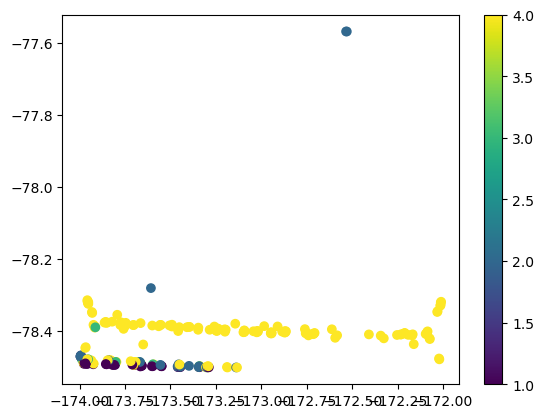

In [29]:
plt.scatter(ib_data['lon'], ib_data['lat'], c = ib_data['ib_class'])
plt.colorbar()

In [472]:
y

array([31.90660039, 31.51906537, 31.03057604, 31.00542709, 30.24972294])

In [112]:
gdf.pop('w_surface_window_final')
gdf.pop('pflags')

gdf.keys()

Index(['time', 'cycle', 'segment_id', 'n_fit_photons', 'h_mean', 'rgt',
       'rms_misfit', 'dh_fit_dx', 'h_sigma', 'y_atc', 'spot', 'x_atc', 'gt',
       'region', 'lon', 'lat', 'fb', 'year', 'month', 'day'],
      dtype='object')

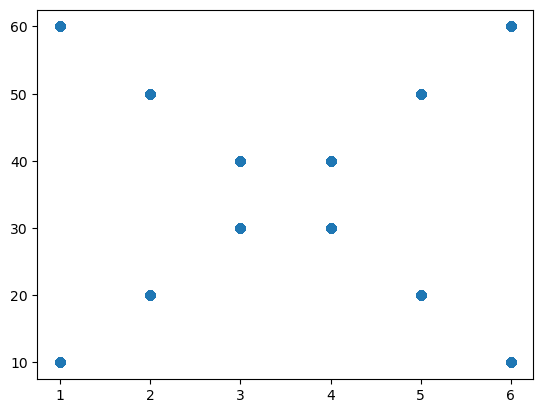

In [110]:
plt.scatter(gdf['spot'], gdf['gt'])

In [109]:
np.unique(gdf['spot'])

array([1, 2, 3, 4, 5, 6], dtype=uint8)

In [78]:
idx = (gdf['rgt'] == 1384) # & (gdf['cycle'] == 7)
gdf1 = gdf.loc[idx, :]
gdf1.head(4)

,cycle,w_surface_window_final,pflags,segment_id,n_fit_photons,h_mean,rgt,rms_misfit,dh_fit_dx,h_sigma,y_atc,spot,x_atc,gt,region,geometry,lon,lat
time,,,,,,,,,,,,,,,,,,
2020-03-26 09:07:39.171346432,6,4.040520,0,1406704,4,-30.034691,1384,0.323014,-0.104883,0.161621,46.882694,4,28161464.0,30,10,POINT (-108.52975 -72.50869),-108.529747,-72.508692
2020-03-26 09:07:39.272377600,6,7.922518,0,1406733,4,-30.500975,1384,0.032018,0.309760,0.016293,3414.154297,6,28162058.0,10,10,POINT (-108.43267 -72.51801),-108.432669,-72.518010
2020-03-26 09:07:39.332743936,6,3.000000,0,1406755,4,-30.191259,1384,0.139918,-0.006242,0.069959,3414.283936,6,28162484.0,10,10,POINT (-108.43436 -72.52179),-108.434360,-72.521794
2020-03-26 09:07:39.339834368,6,6.179001,0,1406757,5,-30.167280,1384,0.078703,-0.241124,0.035558,3414.319336,6,28162534.0,10,10,POINT (-108.43456 -72.52224),-108.434557,-72.522235


C:\Users\yoko2261\AppData\Local\anaconda3\envs\myenv\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


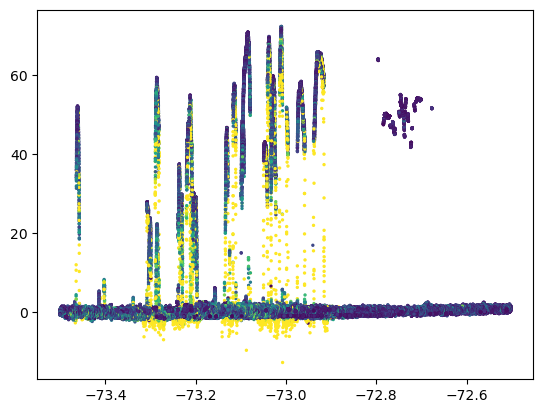

In [79]:
count, value = np.histogram(gdf['h_mean'], bins = 5000, range = (-100, 100))
value = value[:-1] + (value[1] - value[2])/2
mode = value[np.argmax(count)]

gdf1.loc[:, 'fb'] = gdf1['h_mean'].values - mode

# plt.scatter(gdf1['lat'], gdf1['h_mean'], s = 1, c = gdf1['rms_misfit'], vmin = 0, vmax = 1)
plt.scatter(gdf1['lat'], gdf1['fb'], s = 2, c = gdf1['h_sigma'], vmin = 0, vmax = 0.5)
# plt.axhline(mode, color = "r")
# plt.xlim(-73.05, -73.0)

In [63]:
count, value = np.histogram(gdf['h_mean'], bins = 5000, range = (-100, 100))
value = value[:-1] + (value[1] - value[2])/2
mode = value[np.argmax(count)]

In [95]:
gdf2 = gdf1.pop('geometry')

In [97]:
gdf1

,time,cycle,w_surface_window_final,pflags,segment_id,n_fit_photons,h_mean,rgt,rms_misfit,dh_fit_dx,h_sigma,y_atc,spot,x_atc,gt,region,lon,lat
0,2020-01-04 01:54:30.495583744,6,3.000000,0,1596577,5,-30.045886,127,0.036608,0.040120,0.016781,-3316.805664,2,31939810.0,50,12,-108.106661,-73.502429
1,2020-01-04 01:54:30.495866368,6,3.000000,0,1596577,6,-30.117353,127,0.115646,-0.097173,0.058069,-3316.810303,2,31939812.0,50,12,-108.106670,-73.502412
2,2020-01-04 01:54:30.498686464,6,3.000000,0,1596578,6,-30.177637,127,0.186278,0.073214,0.084562,-3316.855957,2,31939832.0,50,12,-108.106758,-73.502235
3,2020-01-04 01:54:30.498969856,6,3.000000,0,1596578,6,-30.152355,127,0.134129,-0.081090,0.063263,-3316.860596,2,31939834.0,50,12,-108.106767,-73.502217
4,2020-01-04 01:54:30.499252992,6,3.000000,0,1596578,6,-30.169440,127,0.195350,-0.099596,0.084779,-3316.865723,2,31939836.0,50,12,-108.106775,-73.502199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248399,2020-12-28 08:42:20.325724928,10,3.000000,0,1602281,14,-29.460724,66,0.261074,0.087206,0.085637,3327.911865,2,32053384.0,20,12,-108.009643,-72.502659
3248400,2020-12-28 08:42:20.326007808,10,3.000000,0,1602281,9,-29.597854,66,0.235969,-0.090811,0.100283,3327.914307,2,32053386.0,20,12,-108.009651,-72.502641
3248401,2020-12-28 08:42:20.326574336,10,5.038675,0,1602282,12,-29.687810,66,0.159164,-0.196134,0.078642,3327.917725,2,32053390.0,20,12,-108.009667,-72.502605
3248402,2020-12-28 08:42:20.326856960,10,3.000000,0,1602282,14,-29.502427,66,0.245172,-0.075241,0.073052,3327.917969,2,32053392.0,20,12,-108.009675,-72.502588


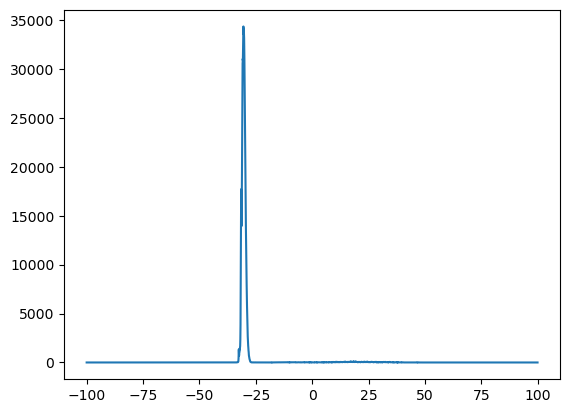

In [64]:
plt.plot(value, count)

In [84]:
gdf1 = gdf.reset_index()

In [92]:
gdf1['time'].dt.day

0           4
1           4
2           4
3           4
4           4
           ..
3248399    28
3248400    28
3248401    28
3248402    28
3248403    28
Name: time, Length: 3248404, dtype: int32

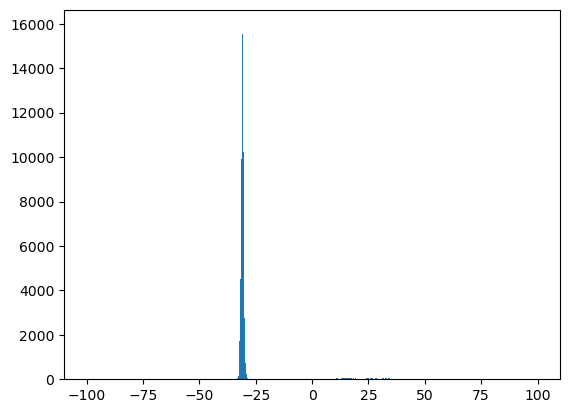

In [46]:
plt.hist(gdf1['h_mean'], bins = 2000, range = (-100, 100));

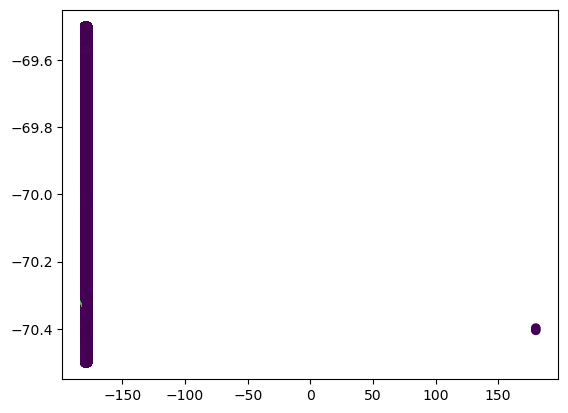

In [103]:
plt.scatter(gdf['lon'], gdf['lat'], c = gdf['fb'], s = 2, vmin = 0, vmax = 50)

In [81]:
gdf.to_csv("test.csv")

In [ ]:
%%time
# regular expression operator for extracting information from files
rx = re.compile(r'(ATL\d{2})(-\d{2})?_(\d{4})(\d{2})(\d{2})(\d{2})'
    r'(\d{2})(\d{2})_(\d{4})(\d{2})(\d{2})_(\d{3})_(\d{2})(.*?).h5$')
# extract parameters from ICESat-2 granule
PRD,HEM,YY,MM,DD,HH,MN,SS,TRK,CYCL,GRN,RL,VRS,AUX=rx.findall(granule).pop()

# Build ATL06 Request
parms = {
    "poly":poly,
    "cnf": 4,
    "ats": 20.0,
    "cnt": 10,
    "len": 40.0,
    "res": 20.0
}

# Request ATL06 Data
gdf = icesat2.atl06(parms, granule)

# Return DataFrame
print("Reference Ground Tracks: {} to {}".format(min(gdf["rgt"]), max(gdf["rgt"])))
print("Cycle: {} to {}".format(min(gdf["cycle"]), max(gdf["cycle"])))
print("Retrieved {} points from SlideRule".format(len(gdf["h_mean"])))